### Step 1: Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

### Step 2: Data Inspection

In [2]:
train = pd.read_csv("C:/Users/shubh/Desktop/PYTHON/Job-a-thon/train_Df64byy.csv")
test = pd.read_csv("C:/Users/shubh/Desktop/PYTHON/Job-a-thon/test_YCcRUnU.csv")

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


### Step 3: Data Cleaning

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [9]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [10]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [11]:
train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [12]:
train['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [13]:
train['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

### We can see that all the 3 Variables with missing values are categorical, hence, we will impute the missing value by the mode from the respective columns

In [14]:
train['Health Indicator'] = train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])

In [15]:
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0])

In [16]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

__We have succesfully imputed the missing values in the columns__

### Step 4: Exploratory Data Analysis

In [17]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [18]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


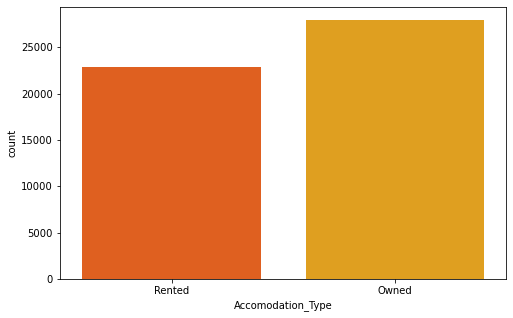

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Accomodation_Type',data=train,palette='autumn')

__Owned Accomodation more than Rented__

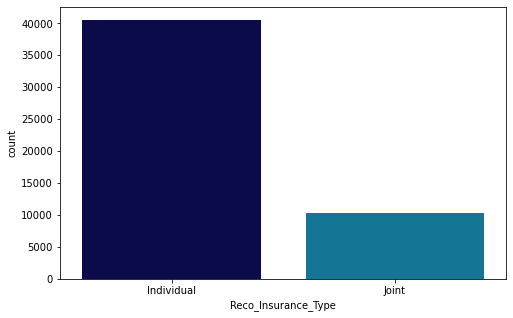

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Reco_Insurance_Type', data=train, palette='ocean')

__Recommended Insurance are more of Individual Type__

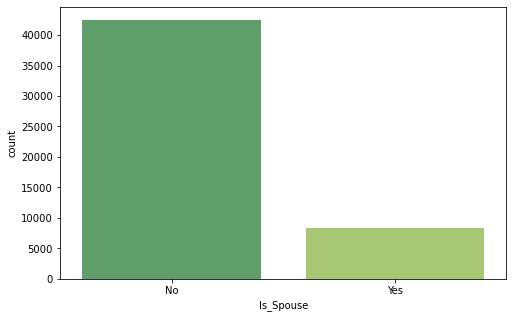

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Spouse', data=train, palette='summer')

__There are more of singles__

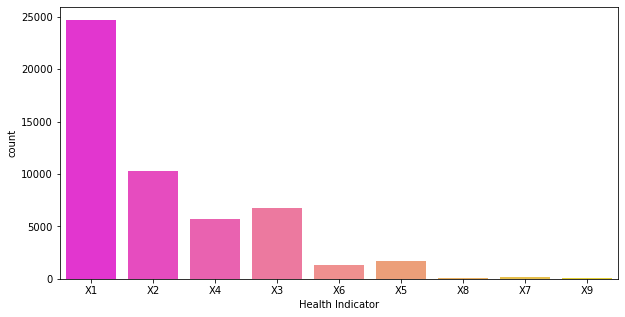

In [22]:
plt.figure(figsize=(10,5))
sns.countplot('Health Indicator', data=train, palette='spring')

__Most of the customers have X1 health type__

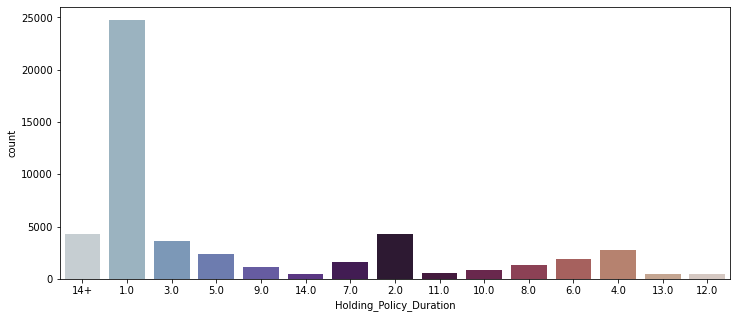

In [23]:
plt.figure(figsize=(12,5))
sns.countplot('Holding_Policy_Duration', data=train, palette='twilight')

__Most of the customers have 1 year of Policy Duration__

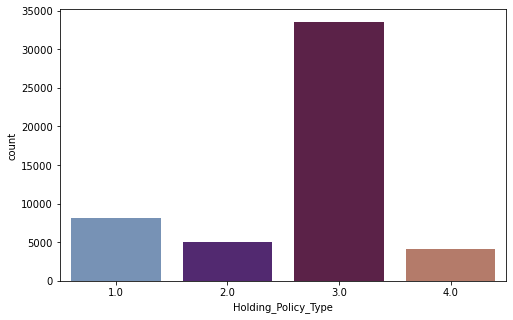

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Holding_Policy_Type', data=train, palette='twilight')

__Policy Type 3 has the highest number of holders__

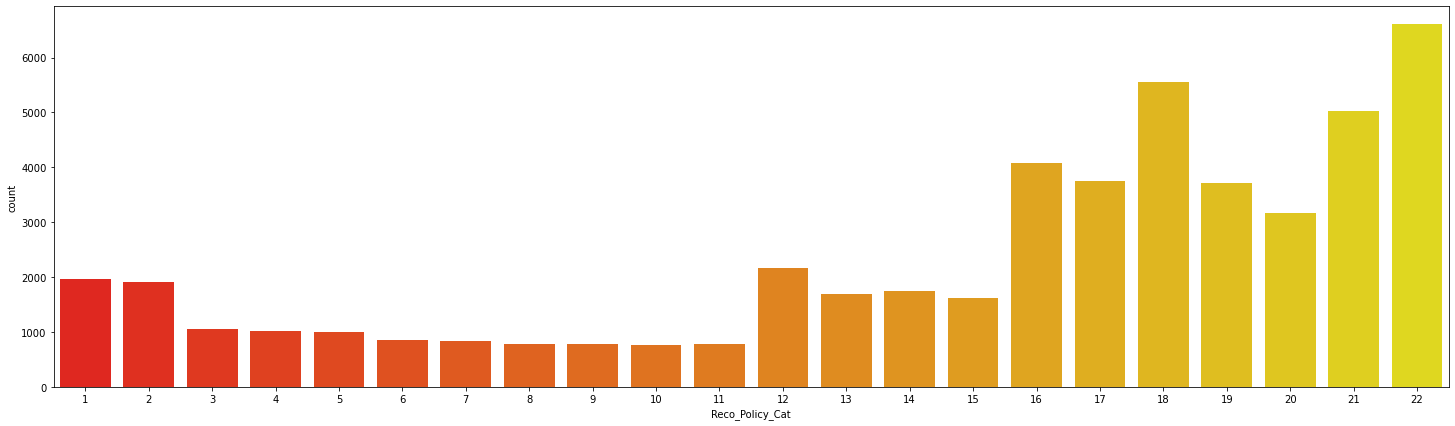

In [25]:
plt.figure(figsize=(25,7))
sns.countplot('Reco_Policy_Cat', data=train, palette='autumn')

__Policy category 22 and 18 are highest__

### Step 5: Building Model

In [26]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [27]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [28]:
OH_col = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Health Indicator']

In [29]:
OH_col

['Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Health Indicator']

In [30]:
for col in OH_col:
    
    temp=pd.get_dummies(train[col],prefix=col,dtype=float)
    train=pd.concat([temp,train],1)
    train.drop([col],1,inplace=True)    

In [31]:
for col in OH_col:
    temp1=pd.get_dummies(test[col],prefix=col,dtype=float)
    test=pd.concat([temp1,test],1)
    test.drop([col],1,inplace=True)

In [32]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].replace(['14+'],[15])
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].replace(['14+'],[15])

In [33]:
train.dtypes

Health Indicator_X1               float64
Health Indicator_X2               float64
Health Indicator_X3               float64
Health Indicator_X4               float64
Health Indicator_X5               float64
Health Indicator_X6               float64
Health Indicator_X7               float64
Health Indicator_X8               float64
Health Indicator_X9               float64
Reco_Policy_Cat_1                 float64
Reco_Policy_Cat_2                 float64
Reco_Policy_Cat_3                 float64
Reco_Policy_Cat_4                 float64
Reco_Policy_Cat_5                 float64
Reco_Policy_Cat_6                 float64
Reco_Policy_Cat_7                 float64
Reco_Policy_Cat_8                 float64
Reco_Policy_Cat_9                 float64
Reco_Policy_Cat_10                float64
Reco_Policy_Cat_11                float64
Reco_Policy_Cat_12                float64
Reco_Policy_Cat_13                float64
Reco_Policy_Cat_14                float64
Reco_Policy_Cat_15                

In [34]:
test.dtypes

Health Indicator_X1               float64
Health Indicator_X2               float64
Health Indicator_X3               float64
Health Indicator_X4               float64
Health Indicator_X5               float64
Health Indicator_X6               float64
Health Indicator_X7               float64
Health Indicator_X8               float64
Health Indicator_X9               float64
Reco_Policy_Cat_1                 float64
Reco_Policy_Cat_2                 float64
Reco_Policy_Cat_3                 float64
Reco_Policy_Cat_4                 float64
Reco_Policy_Cat_5                 float64
Reco_Policy_Cat_6                 float64
Reco_Policy_Cat_7                 float64
Reco_Policy_Cat_8                 float64
Reco_Policy_Cat_9                 float64
Reco_Policy_Cat_10                float64
Reco_Policy_Cat_11                float64
Reco_Policy_Cat_12                float64
Reco_Policy_Cat_13                float64
Reco_Policy_Cat_14                float64
Reco_Policy_Cat_15                

In [35]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(float)
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype(float)

In [36]:
X = train.drop(columns = ['ID', 'City_Code', 'Region_Code', 'Response'], axis=1)
y = train['Response']

## Checking the best performing ML Model

First Checking the RandomForest Model

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=2)

In [38]:
rf= RandomForestClassifier(n_estimators=700, n_jobs=-1, verbose=0)

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=700, n_jobs=-1)

In [40]:
y_pred = rf.predict(x_valid)

In [41]:
roc_auc_score(y_valid, y_pred)

0.525799289379177

Let's implement XGBoost

In [42]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=.05)

In [43]:
xgb.fit(x_train, y_train)

C:\Shubham Personal\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred = xgb.predict(x_valid)

In [45]:
roc_auc_score(y_valid, y_pred)

0.5137754620572801

Let try if may give Better accuracy with LogisticRegression, also we can get the co-effecients through it.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Model Building
features= X.columns
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_valid)

In [48]:
np.round(LR.coef_, decimals=2)

array([[-0.1 , -0.03, -0.03, -0.02, -0.  , -0.01,  0.  , -0.  , -0.  ,
        -0.07, -0.04, -0.01, -0.03,  0.  , -0.01, -0.01,  0.  , -0.01,
        -0.01, -0.01,  0.01, -0.01, -0.01,  0.04, -0.03,  0.02, -0.03,
         0.01, -0.  , -0.05,  0.05, -0.04, -0.02, -0.14,  0.  , -0.2 ,
         0.01, -0.2 ,  0.01, -0.  , -0.19, -0.02,  0.01,  0.01, -0.  ]])

In [49]:
roc_auc_score(y_valid, y_pred)

0.5

## As we can see that Random Forest Classifier is performing the best, Hence, we will continue with it to apply on the test dataset

In [50]:
rf= RandomForestClassifier(bootstrap=False, max_features=9, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=700, n_jobs=-1,
                       verbose=0)

In [51]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=False, max_features=9, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=700, n_jobs=-1)

In [52]:
x_test=test.drop(['ID', 'City_Code', 'Region_Code'], axis=1)

In [54]:
pred = rf.predict(x_test)

In [56]:
submission=pd.DataFrame(list(zip(test['ID'],list(pred))),
                       columns=['ID','Response'])

In [57]:
submission.to_csv("C:/Users/shubh/Desktop/PYTHON/Job-a-thon/Job-a-thon Submission.csv",index=False)